In [57]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [28]:
# read in data
avacado = pd.read_csv(r'/home/chad/Desktop/avacado_demand/data/avocado-updated-2020.csv')

# make sure date columns is datetime
avacado['date'] = pd.to_datetime(avacado['date'])

# preview column names
avacado.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'geography'],
      dtype='object')

count    30021.000000
mean         1.390930
std          0.381347
min          0.440000
25%          1.110000
50%          1.350000
75%          1.630000
max          3.250000
Name: average_price, dtype: float64


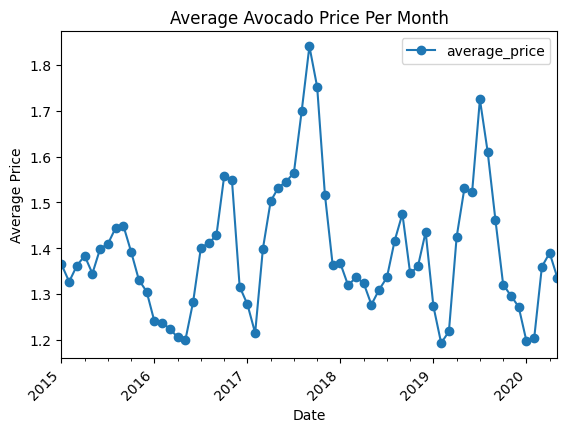

In [38]:
# summary statistics
print(avacado['average_price'].describe())

# group by date to view trending price per month
average_price_per_month = avacado.groupby(avacado['date'].dt.to_period('M'))['average_price'].mean().reset_index()

# Convert the 'date' column back to datetime for plotting
average_price_per_month['date'] = average_price_per_month['date'].dt.to_timestamp()

# Plot the data
average_price_per_month.plot(x='date', y='average_price', kind='line', marker='o')

# Rotate and align the x labels
plt.gcf().autofmt_xdate(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Avocado Price Per Month')
plt.show()

<Axes: xlabel='total_volume', ylabel='average_price'>

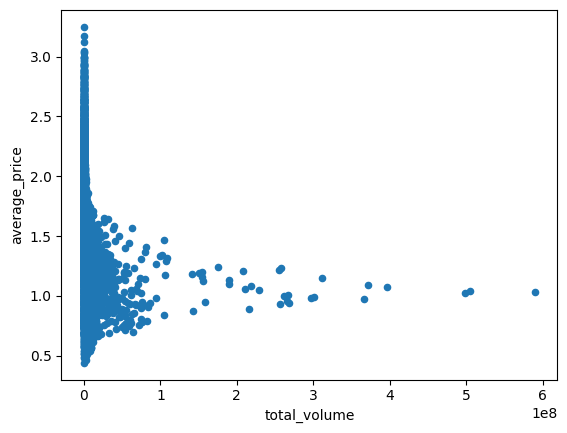

In [54]:
# generate base demand curve
aggregated_avacado = avacado.groupby(['average_price', 'geography']).agg({
    'total_volume': 'sum'  # Sum the quantities
}).reset_index()

# plot data to preview base demand curve
aggregated_avacado.plot(x='total_volume', y='average_price', kind='scatter', marker='o')

<Axes: xlabel='total_volume', ylabel='average_price'>

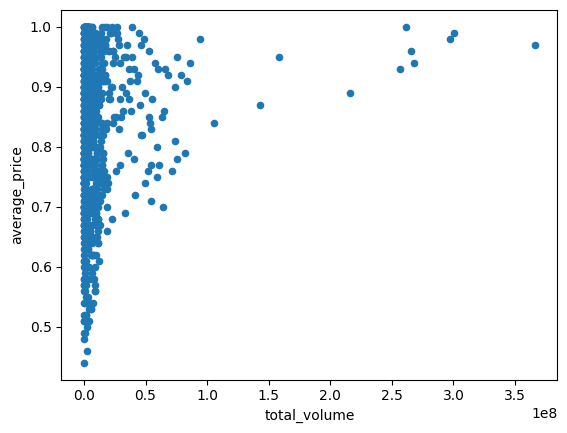

In [55]:
giffen_avacados = aggregated_avacado.loc[aggregated_avacado['average_price'] <= 1]

# plot data to preview base demand curve
giffen_avacados.plot(x='total_volume', y='average_price', kind='scatter', marker='o')

<Axes: xlabel='total_volume', ylabel='average_price'>

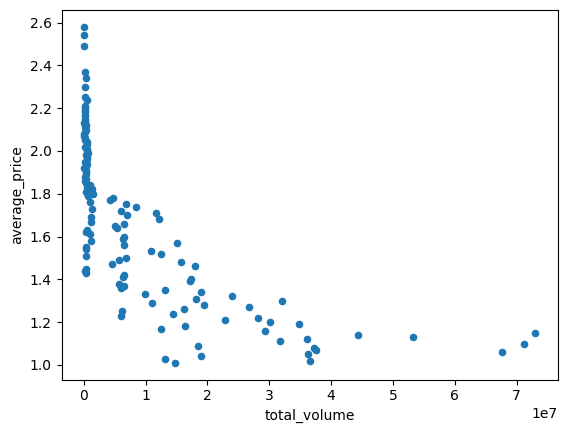

In [61]:
normal_avacados = aggregated_avacado.loc[aggregated_avacado['average_price'] > 1]

# plot data to preview base demand curve
normal_avacados.loc[normal_avacados['geography'] == 'California'].plot(x='total_volume', y='average_price', kind='scatter', marker='o')

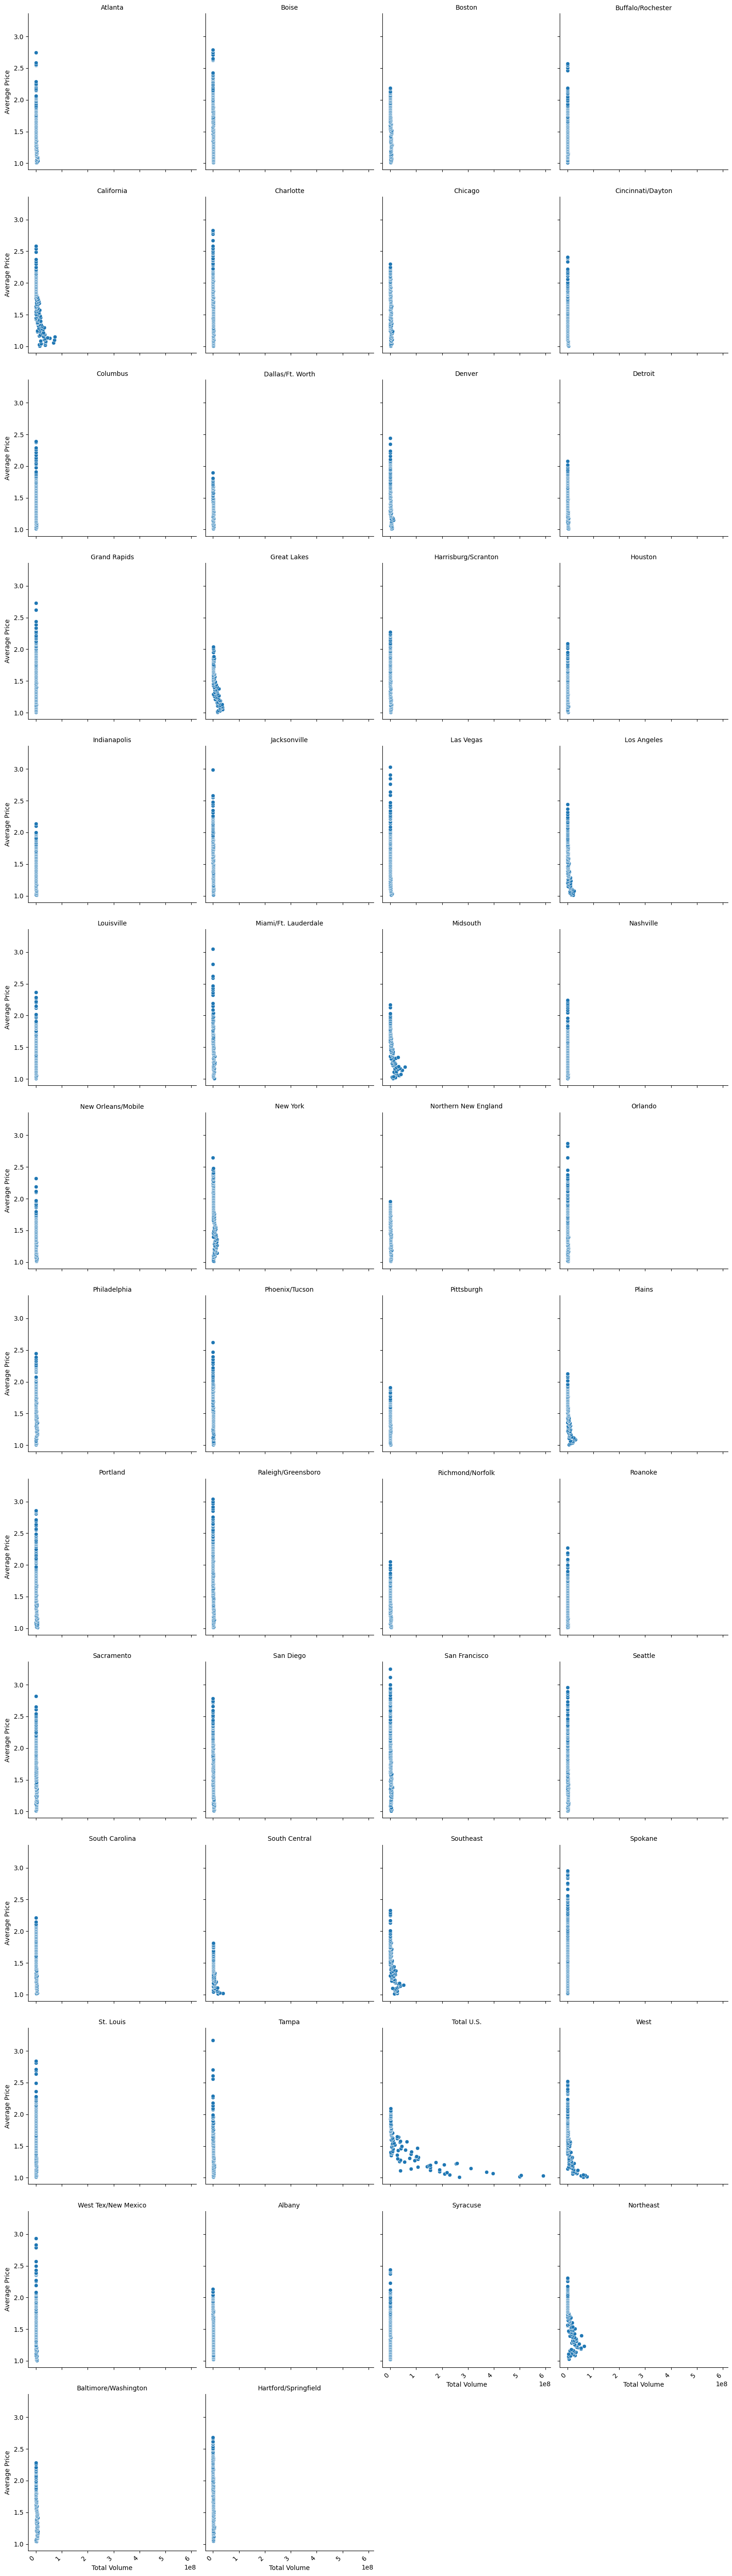

In [59]:
# Create a FacetGrid with 'geography' as the column
g = sns.FacetGrid(normal_avacados, col='geography', col_wrap=4, height=4)

# Map the scatter plot to each facet
g.map_dataframe(sns.scatterplot, x='total_volume', y='average_price')

# Set the scale to linear for both axes
g.set(xscale='linear', yscale='linear')

# Adjust the axis labels and titles
g.set_axis_labels('Total Volume', 'Average Price')
g.set_titles(col_template='{col_name}')

# Rotate and align the x labels if needed
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.show()